# Titanic

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
df=df[['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked','Survived']]

In [9]:
df[df.columns].corr()['Survived']

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

# Survived

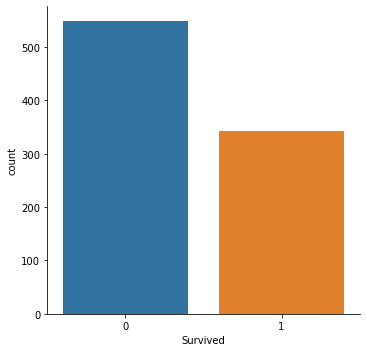

In [10]:
sns.factorplot('Survived',data=df,kind='count')

# Pclass 

In [11]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [12]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

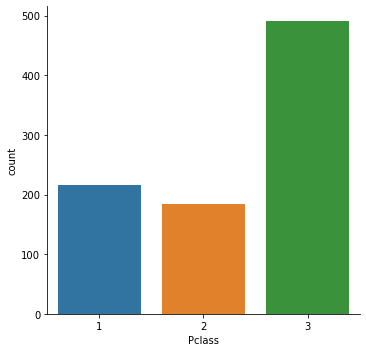

In [13]:
sns.factorplot('Pclass',data=df,kind='count')

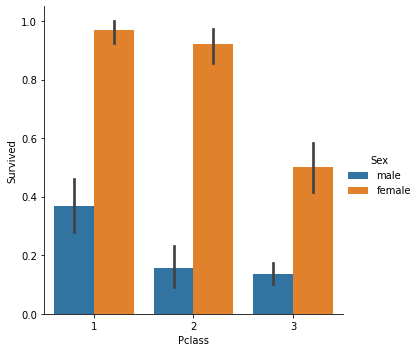

In [14]:
sns.factorplot(x='Pclass',y='Survived',data=df,kind='bar',hue = 'Sex')

In [15]:
#Converting 1,2,3 to string because ml algos sees 1<2<3
df['Pclass']=df['Pclass'].replace( 1 , "FC") 
df['Pclass']=df['Pclass'].replace( 2 , "SC") 
df['Pclass']=df['Pclass'].replace( 3 , "TC") 

# Name

In [16]:
# Has no null values and not needed to perform future predictions as name column is not related to target variable (Survived) 

# Sex

In [17]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

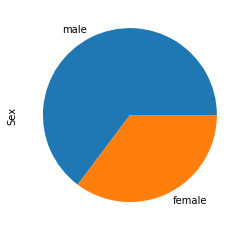

In [19]:
df['Sex'].value_counts().plot(kind = 'pie')

In [20]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


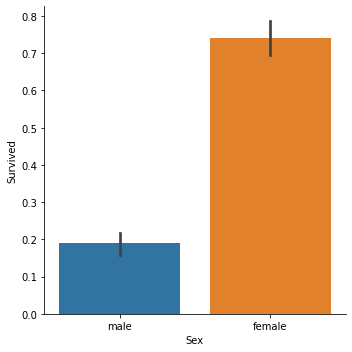

In [21]:
sns.factorplot(x='Sex',y='Survived',data=df,kind='bar')

#### Here we observe females survived more than males

# Age

In [22]:
df['Age'].isnull().sum()

177

In [23]:
df['Age'].describe().to_frame()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197FE524A30>]],
      dtype=object)

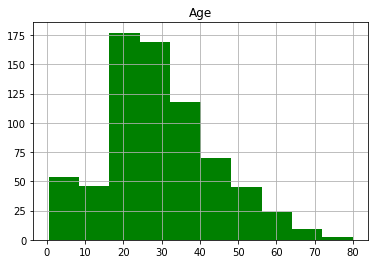

In [24]:
 df.hist(column='Age',color = "green")

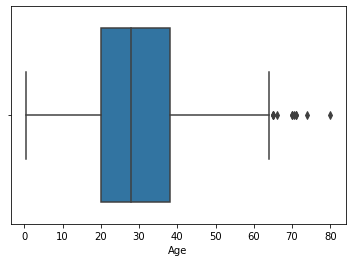

In [25]:
 sns.boxplot(x = 'Age', data = df)

In [26]:
df['Age'].dropna().quantile(np.arange(0,1.1,.1)).to_frame()

,Age
0.0,0.42
0.1,14.00
0.2,19.00
0.3,22.00
0.4,25.00
0.5,28.00
0.6,31.80
0.7,36.00
0.8,41.00
0.9,50.00


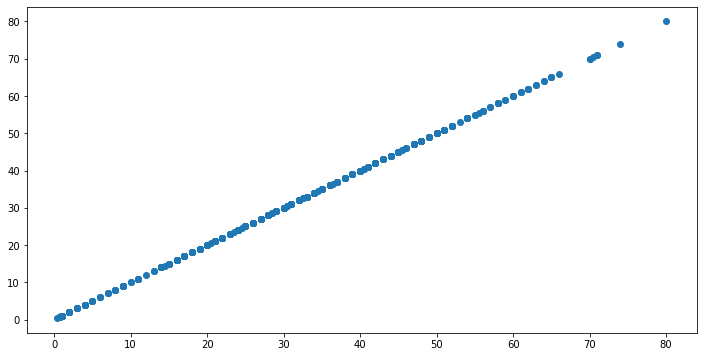

In [27]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Age'], df['Age'])
plt.show()

In [28]:
df["Age"] = np.where(df["Age"] >60,60,df['Age'])

In [29]:
df['Age'].dropna().quantile(np.arange(0,1.1,.1)).to_frame()

,Age
0.0,0.42
0.1,14.00
0.2,19.00
0.3,22.00
0.4,25.00
0.5,28.00
0.6,31.80
0.7,36.00
0.8,41.00
0.9,50.00


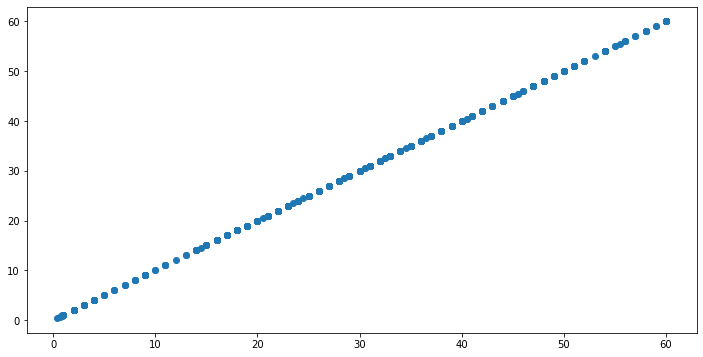

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Age'], df['Age'])
plt.show()

In [31]:
df['Age'].isnull().sum()

177

In [32]:
df.groupby(['Pclass', 'Sex'])['Age'].median().to_frame()

Age
Pclass Sex         
FC     female  35.0
       male    40.0
SC     female  28.0
       male    30.0
TC     female  21.5
       male    25.0

In [33]:
df['Age']= np.where(df['Age'].isnull() & df['Pclass']== 'FC', 37 , df['Age'])
df['Age']= np.where(df['Age'].isnull() & df['Pclass']== 'SC', 29 , df['Age'])
df['Age']= np.where(df['Age'].isnull() & df['Pclass']== 'FC', 22.5 , df['Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000197FE86B310>]],
      dtype=object)

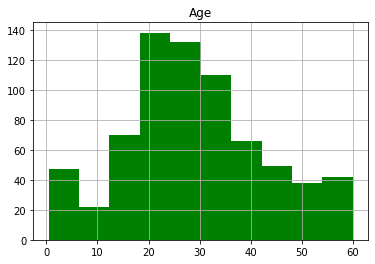

In [34]:
df.hist(column='Age',color = "green")

# SibSp

In [35]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

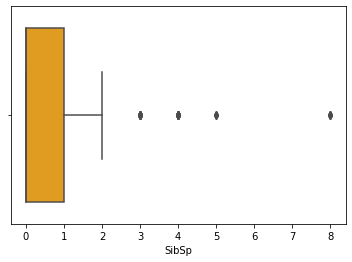

In [36]:
sns.boxplot(x='SibSp',data=df, color = "orange")

# Parch

In [37]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

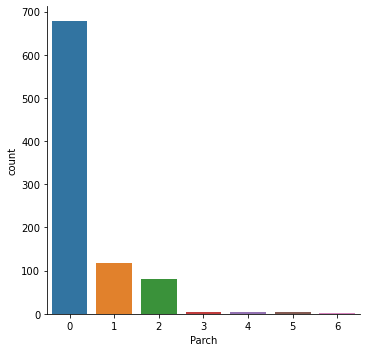

In [38]:
sns.factorplot('Parch',data=df,kind='count')

In [39]:
# will combine Parch and SibSp as they both serve the same purpose 

In [40]:
df['Total_relatives'] = df['SibSp'] + df['Parch']

# Ticket 

In [41]:
# not important for making predictions

# Fare

In [42]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [43]:
df['Fare'].dropna().quantile(np.arange(0,1.1,.1)).to_frame()

,Fare
0.0,0.0000
0.1,7.5500
0.2,7.8542
0.3,8.0500
0.4,10.5000
0.5,14.4542
0.6,21.6792
0.7,27.0000
0.8,39.6875
0.9,77.9583


In [44]:
df['Fare'].dropna().quantile([.92, .96, .98, .99]).to_frame()

,Fare
0.92,82.17080
0.96,133.99000
0.98,211.33750
0.99,249.00622


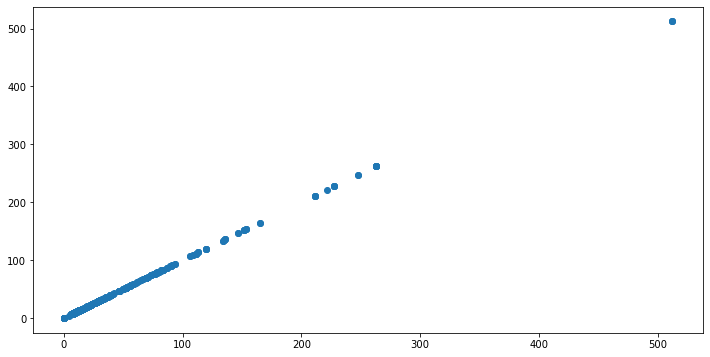

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['Fare'], df['Fare'])
plt.show()

In [46]:
df["Fare"] = np.where(df["Fare"] >250, 250 , df['Fare'])

In [47]:
df['Fare'].dropna().quantile([.92, .96, .98, 1]).to_frame()

,Fare
0.92,82.1708
0.96,133.9900
0.98,211.3375
1.00,250.0000


In [48]:
df['Fare'].isnull().sum()

0

# Cabin

In [49]:
df['Cabin'].isnull().sum()

687

In [50]:
# Cabin is not important for the prediction

# Embarked

In [51]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
df['Embarked'].isnull().sum()

2

In [53]:
# Embarked is not important for predicting the survival of the person

# Dropping not necessary columns

In [54]:
df.drop(['Embarked','Cabin','Ticket','PassengerId','Name'], axis = 1, inplace=True)

In [55]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Total_relatives
0,TC,male,22.0,1,0,7.2500,0,1
1,FC,female,38.0,1,0,71.2833,1,1
2,TC,female,26.0,0,0,7.9250,1,0
3,FC,female,35.0,1,0,53.1000,1,1
4,TC,male,35.0,0,0,8.0500,0,0
